In [1]:
from prophet import Prophet
import pandas as pd

In [2]:
d=pd.read_excel(r"C:\Users\prernagupta\Desktop\shorts-uk.xlsx")


In [3]:
d

,TREND,BASE,START_DATE,FSI,NSI,FSI_YHAT_LOWER,FSI_YHAT,FSI_YHAT_UPPER,NSI_YHAT_LOWER,NSI_YHAT,...,MARKDOWN_INDEX,FASHION_LEADERS_INDEX,TRENDING_INDEX,CATWALK_IMPACT,FSI_PIVOT_POINTS,NSI_PIVOT_POINTS,CREATED_AT,CREATED_BY,LEVELS,REGION
0,Shorts Super Shorts Uk,Apparel,2016-01-04,0.012823,0.008946,0.010228,0.012002,0.013831,0.002455,0.006619,...,1.146393,0.524518,0.634499,0.0,"['2019-08-12', '2020-05-25', '2021-03-08']",['2016-01-11'],2021-09-06 16:16:02.596,camillereyes,Super Category,UK
1,Shorts Super Shorts Uk,Apparel,2016-01-11,0.013095,0.009735,0.010056,0.011692,0.013519,0.003324,0.007237,...,1.131434,0.533869,0.769998,0.0,"['2019-08-12', '2020-05-25', '2021-03-08']",['2016-01-11'],2021-09-06 16:16:02.596,camillereyes,Super Category,UK
2,Shorts Super Shorts Uk,Apparel,2016-01-18,0.013080,0.010744,0.009624,0.011415,0.013020,0.004183,0.007956,...,1.117044,0.543012,0.896334,0.0,"['2019-08-12', '2020-05-25', '2021-03-08']",['2016-01-11'],2021-09-06 16:16:02.596,camillereyes,Super Category,UK
3,Shorts Super Shorts Uk,Apparel,2016-01-25,0.013066,0.011940,0.009581,0.011198,0.013027,0.004693,0.008781,...,1.103222,0.551946,1.013509,0.0,"['2019-08-12', '2020-05-25', '2021-03-08']",['2016-01-11'],2021-09-06 16:16:02.596,camillereyes,Super Category,UK
4,Shorts Super Shorts Uk,Apparel,2016-02-01,0.012674,0.013289,0.009429,0.011061,0.012899,0.005431,0.009713,...,1.089968,0.560671,1.121522,0.0,"['2019-08-12', '2020-05-25', '2021-03-08']",['2016-01-11'],2021-09-06 16:16:02.596,camillereyes,Super Category,UK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Shorts Super Shorts Uk,Apparel,2022-06-27,NaN,NaN,0.023613,0.025322,0.027123,0.043488,0.047754,...,NaN,NaN,NaN,0.0,"['2019-08-12', '2020-05-25', '2021-03-08']",['2016-01-11'],2021-09-06 16:16:02.596,camillereyes,Super Category,UK
339,Shorts Super Shorts Uk,Apparel,2022-07-04,NaN,NaN,0.023957,0.025490,0.027388,0.039365,0.043859,...,NaN,NaN,NaN,0.0,"['2019-08-12', '2020-05-25', '2021-03-08']",['2016-01-11'],2021-09-06 16:16:02.596,camillereyes,Super Category,UK
340,Shorts Super Shorts Uk,Apparel,2022-07-11,NaN,NaN,0.023647,0.025491,0.027104,0.035692,0.039817,...,NaN,NaN,NaN,0.0,"['2019-08-12', '2020-05-25', '2021-03-08']",['2016-01-11'],2021-09-06 16:16:02.596,camillereyes,Super Category,UK
341,Shorts Super Shorts Uk,Apparel,2022-07-18,NaN,NaN,0.023601,0.025320,0.027003,0.031644,0.035765,...,NaN,NaN,NaN,0.0,"['2019-08-12', '2020-05-25', '2021-03-08']",['2016-01-11'],2021-09-06 16:16:02.596,camillereyes,Super Category,UK


In [4]:
d=d.iloc[:, [2,3]]

In [5]:
df=d.dropna()
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

<ipython-input-5-ec1e916fc466>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds']= pd.to_datetime(df['ds'])


In [6]:
df

,ds,y
0,2016-01-04,0.012823
1,2016-01-11,0.013095
2,2016-01-18,0.013080
3,2016-01-25,0.013066
4,2016-02-01,0.012674
...,...,...
286,2021-06-28,0.033493
287,2021-07-05,0.034659
288,2021-07-12,0.035434
289,2021-07-19,0.034273


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


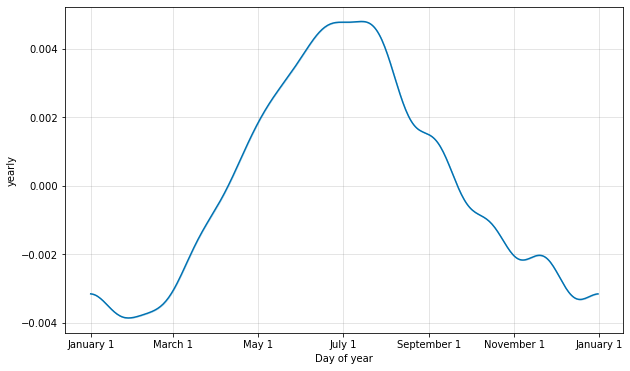

In [7]:
from prophet.plot import plot_yearly
m = Prophet().fit(df)
a = plot_yearly(m)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


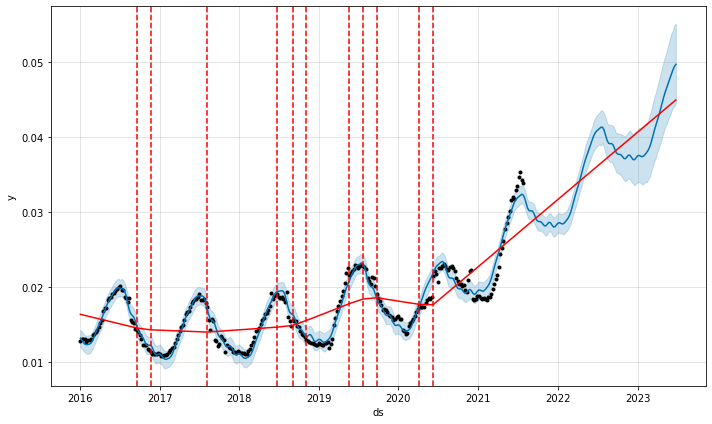

In [8]:
from prophet.plot import add_changepoints_to_plot
m = Prophet()
# define the model
# fit the model
m.fit(df)
future = m.make_future_dataframe(periods=100, freq='W')
#prop only uses weekly seasonlity, and change points for first 80%
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


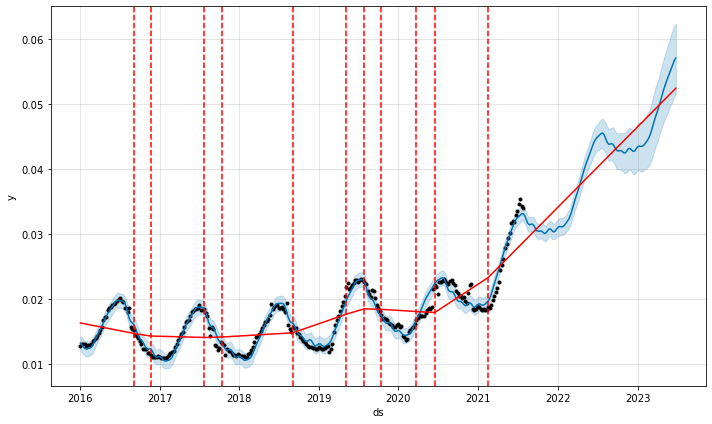

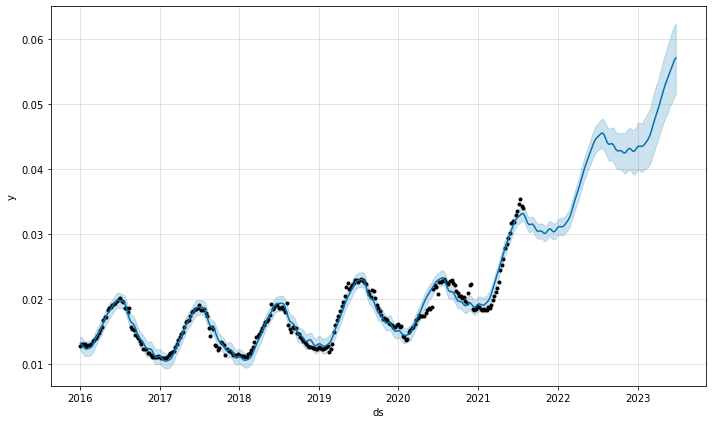

In [9]:
from prophet.plot import add_changepoints_to_plot
m = Prophet(yearly_seasonality=True, changepoint_range=1.0  ,changepoint_prior_scale=0.05, growth='linear')
# define the model
# fit the model
m.fit(df)

future = m.make_future_dataframe(periods=100, freq='W')
#prop only uses weekly seasonlity, and change points for first 80%
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)
fig = m.plot(fcst)

INFO:prophet:Making 6 forecasts with cutoffs between 2018-02-07 00:00:00 and 2020-07-26 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

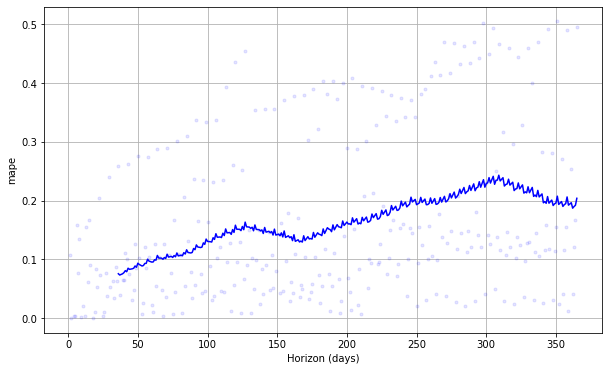

In [10]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')